# Welcome to Hypothesis Testing


![Types of Stats](Stats-types.jpg)


![descriptive-and-inferential-statistics](descriptive-and-inferential-statistics.jpeg)



We will use some built-in datasets from the pydataset library to review and explore some concepts. 

1. How distributions help us make inferernces

2. Sample vs. population

3. Asking interesting and relevant questions of your data

4. Ways to answer questions

5. How Hypothesis testing helps us make inferences (In this lesson we will introduce some broad concepts related to hypothesis testing, and in future lessons we will look at examples of 3 types of hypothesis tests in detail.)

6. Key terms in hypothesis testing


In doing all of this, we will also practice transforming datasets using python, understanding the structure of an existing dataset and how it may differ from what you want, how to define an observation vs. a row. 

So, let's get to it...

__________________________________________________

## Data Wrangling

First, we need data. In this lesson, instead of generating random data, we will use data from the pydataset library which contains 756 datasets available for use. 
As you will soon get used to, every data science project starts with prject planning followed by acquiring and preparing data, a.k.a. wrangling the data. One non-negotiable to having prepared data ready to explore is that each row represents an observation. Let's take an example. 

In [94]:
# Using open datasets from pydataset
from pydataset import data

import pandas as pd
import numpy as np

from scipy import stats

import matplotlib.pyplot as plt

In [95]:
# take a look at available datasets 
data()

,dataset_id,title
0,AirPassengers,Monthly Airline Passenger Numbers 1949-1960
1,BJsales,Sales Data with Leading Indicator
2,BOD,Biochemical Oxygen Demand
3,Formaldehyde,Determination of Formaldehyde
4,HairEyeColor,Hair and Eye Color of Statistics Students
...,...,...
752,VerbAgg,Verbal Aggression item responses
753,cake,Breakage Angle of Chocolate Cakes
754,cbpp,Contagious bovine pleuropneumonia
755,grouseticks,Data on red grouse ticks from Elston et al. 2001


We are going to use the **HairEyeColor** dataset. 

In [96]:
# Extract just the row that contains the HairEyeColor dataset using iloc
data().iloc[4]

dataset_id                                 HairEyeColor
title         Hair and Eye Color of Statistics Students
Name: 4, dtype: object

Ok, We are told this dataset contains information about Hair and Eye color of a group of statistics students. 
Let's take a look. 

In [97]:
# store that data in a dataframe named df
df = data('HairEyeColor')

In [98]:
# look at the numbers of rows and columns
df.shape

(32, 4)

In [99]:
# look at the first 5 rows
df.head()

,Hair,Eye,Sex,Freq
1,Black,Brown,Male,32
2,Brown,Brown,Male,53
3,Red,Brown,Male,10
4,Blond,Brown,Male,3
5,Black,Blue,Male,11


**Question:** 

What do you notice about the structure of this dataset?

It's already aggregated!
_____________________________________________

**Question:** 

If we take a look at a single row, what/who does it represent? 

In [100]:
# write the code to view a single row

df.iloc[0]

Hair    Black
Eye     Brown
Sex      Male
Freq       32
Name: 1, dtype: object

In [101]:
# is each row "REALLY" a unique combination or are there any duplicates? 
df.groupby(['Hair', 'Eye', 'Sex']).count()['Freq'].sum()

32

In [102]:
df.groupby(['Hair', 'Eye', 'Sex']).nunique().sum()

Freq    32
dtype: int64

____________________________________________


Our data has been aggregated! UGH! I *strongly dislike* starting with aggregated data, as a data scientist :=| It limits what I can find out. 

I want my data in the form where one row represents one observation. 


**Question:**

In this scenario, based on the description of the dataset, a single observation should be what?  

A single statistic student!
___________________________________________


In [107]:
# the very slick and simple way of doing what we are going to do in a loop below...
df.loc[df.index.repeat(df.Freq)].reset_index(drop=True)

,Hair,Eye,Sex,Freq
0,Black,Brown,Male,32
1,Black,Brown,Male,32
2,Black,Brown,Male,32
3,Black,Brown,Male,32
4,Black,Brown,Male,32
...,...,...,...,...
587,Blond,Green,Female,8
588,Blond,Green,Female,8
589,Blond,Green,Female,8
590,Blond,Green,Female,8


In [93]:
df.loc[1] == df.iloc[0]

Hair      True
Eye       True
Sex       True
Freq      True
traits    True
Name: 1, dtype: bool

So, let's stretch this data out, so that each row represents a single student. 

To do so, we need to ... 

1. repeat each row by the frequency. 

2. remove the frequency column. 

We should end up the same number of rows as the total number of students represented, because...

EACH ROW IS AN OBSERVATION AND EACH OBSERVATION IS A STUDENT. 


**Question:**

So, how can I compute how many rows we will end up with? Or how many students were surveyed?

If you need to take another peek at the data, go for it! `df.head()` is a quick and easy way. 

**Answer:**

In [59]:
# write code to compute how many students are represented in this dataset. 

df.Freq.sum()

592

Cool, so we are looking to end up with that many rows

___________________________________________
_______________________________________

To get there, we will want to repeat each combination of `Hair`, `Eye`, & `Sex` the number of times represented in the `Freq` field. We can get there in the following way:  

1. Create a single column that concatenates Hair, Eye & Sex

2. For the first unique combination of Hair, Eye & Sex, i.e. the first row which is Black, Brown, and Male, create a list that repeats that combination 32 times, which is the `Freq` value. 

3. We want to do that for each row, so once we made it work for one, we will do row two and make sure we can concatenate them, THEN we will put it in a loop to work for all. 

_______________________________________


> 1. Create a single column that concatenates Hair, Eye & Sex

In [60]:
# concatenating using '+' with strings

df['traits'] = df.Hair + ", " + df.Eye + ", " + df.Sex
df.head(2)

,Hair,Eye,Sex,Freq,traits
1,Black,Brown,Male,32,"Black, Brown, Male"
2,Brown,Brown,Male,53,"Brown, Brown, Male"


> 2. Create a list from the first row, which is Black, Brown, and Male, that repeats that combination 32 times. 

In [17]:
# take a look at the first row
df.head(1)

,Hair,Eye,Sex,Freq,traits
1,Black,Brown,Male,32,"Black, Brown, Male"


In [61]:
# extract what we want to repeat: the contents in the traits column
traits = df.traits.iloc[0]
traits

'Black, Brown, Male'

In [62]:
# extract how many times we want to repeat...the value in the Freq column
freq = df.Freq.iloc[0]
freq

32

In [63]:
# use np.repeat to repeat `trait` `Freq` times.
traits_by_freq = np.repeat(df.traits.iloc[0], df.Freq.iloc[0])
traits_by_freq

array(['Black, Brown, Male', 'Black, Brown, Male', 'Black, Brown, Male',
       'Black, Brown, Male', 'Black, Brown, Male', 'Black, Brown, Male',
       'Black, Brown, Male', 'Black, Brown, Male', 'Black, Brown, Male',
       'Black, Brown, Male', 'Black, Brown, Male', 'Black, Brown, Male',
       'Black, Brown, Male', 'Black, Brown, Male', 'Black, Brown, Male',
       'Black, Brown, Male', 'Black, Brown, Male', 'Black, Brown, Male',
       'Black, Brown, Male', 'Black, Brown, Male', 'Black, Brown, Male',
       'Black, Brown, Male', 'Black, Brown, Male', 'Black, Brown, Male',
       'Black, Brown, Male', 'Black, Brown, Male', 'Black, Brown, Male',
       'Black, Brown, Male', 'Black, Brown, Male', 'Black, Brown, Male',
       'Black, Brown, Male', 'Black, Brown, Male'], dtype='<U18')

In [65]:
# Finally, we need that array to be a list
row1_observations = list(traits_by_freq)
row1_observations[0:5]

['Black, Brown, Male',
 'Black, Brown, Male',
 'Black, Brown, Male',
 'Black, Brown, Male',
 'Black, Brown, Male']

In [67]:
# pulling that all together...

row1_obs = list(np.repeat(df.traits.iloc[0], df.Freq.iloc[0]))

print("First original row:\n", df.iloc[0])
print("\nNumber of observations/students:\n",len(row1_obs))
print("\nFirst 5 observations:\n", row1_obs[0:5])
len(row1_obs)

First original row:
 Hair                   Black
Eye                    Brown
Sex                     Male
Freq                      32
traits    Black, Brown, Male
Name: 1, dtype: object

Number of observations/students:
 32

First 5 observations:
 ['Black, Brown, Male', 'Black, Brown, Male', 'Black, Brown, Male', 'Black, Brown, Male', 'Black, Brown, Male']


32

> 3. We want to do that for each row, so let's make sure it works for another row, concatenate them, and then write a loop to do that for all the rows. 

In [68]:
row2_obs = list(np.repeat(df.traits.iloc[1], df.Freq.iloc[1]))


print("Second original row:\n", df.iloc[1])
print("\nNumber of observations/students:\n",len(row2_obs))
print("\nFirst 5 observations:\n", row2_obs[0:5])

Second original row:
 Hair                   Brown
Eye                    Brown
Sex                     Male
Freq                      53
traits    Brown, Brown, Male
Name: 2, dtype: object

Number of observations/students:
 53

First 5 observations:
 ['Brown, Brown, Male', 'Brown, Brown, Male', 'Brown, Brown, Male', 'Brown, Brown, Male', 'Brown, Brown, Male']


53

In [72]:
# concatenate observations from the first original row to the observations from the second
# start with an empty list to hold all observations
obs = []
# add the first rows observations to the list

# obs = obs + row1_obs

obs += row1_obs

len(obs)

32

In [70]:
obs

['Black, Brown, Male',
 'Black, Brown, Male',
 'Black, Brown, Male',
 'Black, Brown, Male',
 'Black, Brown, Male',
 'Black, Brown, Male',
 'Black, Brown, Male',
 'Black, Brown, Male',
 'Black, Brown, Male',
 'Black, Brown, Male',
 'Black, Brown, Male',
 'Black, Brown, Male',
 'Black, Brown, Male',
 'Black, Brown, Male',
 'Black, Brown, Male',
 'Black, Brown, Male',
 'Black, Brown, Male',
 'Black, Brown, Male',
 'Black, Brown, Male',
 'Black, Brown, Male',
 'Black, Brown, Male',
 'Black, Brown, Male',
 'Black, Brown, Male',
 'Black, Brown, Male',
 'Black, Brown, Male',
 'Black, Brown, Male',
 'Black, Brown, Male',
 'Black, Brown, Male',
 'Black, Brown, Male',
 'Black, Brown, Male',
 'Black, Brown, Male',
 'Black, Brown, Male']

In [73]:
# add the second row's observations to the list
# obs = obs + row2_obs
obs += row2_obs

print(len(obs))


85


In [78]:
# for i in range(len(df)):
#    print(i)

In [79]:
# write the loop 
obs = []

# go through all 32 rows
for i in range(len(df)):
    obs += list(np.repeat(df.traits.iloc[i], df.Freq.iloc[i]))

In [82]:
obs[200:210]
len(obs)

592

In [83]:
# create a dataframe from the list. 
obs_df = pd.DataFrame({'traits': obs})
obs_df.head(3)

,traits
0,"Black, Brown, Male"
1,"Black, Brown, Male"
2,"Black, Brown, Male"


In [84]:
# split the traits at the comma into 3 different columns (n=-1 means ALL, so I could put 3 here since I know there are 3)
# expand = True means return to me a dataframe

obs_df = obs_df['traits'].str.split(", ", n=-1, expand=True)

obs_df.head(3)

,0,1,2
0,Black,Brown,Male
1,Black,Brown,Male
2,Black,Brown,Male


In [85]:
# give columns meaningful names
obs_df.columns = ['hair', 'eye', 'sex']
obs_df.head(3)

,hair,eye,sex
0,Black,Brown,Male
1,Black,Brown,Male
2,Black,Brown,Male


In [87]:
obs_df.head()

,hair,eye,sex
0,Black,Brown,Male
1,Black,Brown,Male
2,Black,Brown,Male
3,Black,Brown,Male
4,Black,Brown,Male


In [88]:
obs_df.shape

(592, 3)

In [108]:
obs_df.head()

,hair,eye,sex
0,Black,Brown,Male
1,Black,Brown,Male
2,Black,Brown,Male
3,Black,Brown,Male
4,Black,Brown,Male


___________________________________________________
__________________________________________________


2. Sample vs. Population


According to heffingtons, the estimated population proportion of blue eyes in the U.S. is 27%

https://heffingtons.com/interesting-facts-about-eye-color/

- Brown Eyes: 45%

- Blue Eyes: 27%

- Hazel Eyes: 18% (Note: Hazel eyes consist of shades of brown and green.)

- Green Eyes: 9%

- Other: 1%

In [110]:
sum(obs_df.eye=='Blue')/len(obs_df)

0.36317567567567566

**Question:**

What are some possible reasons why? 

- not large enough sample

- sample probably from 1 location

- self-selected to be in that stats class

- demographic mis-representation

- stats class in norway? 

- age of students? 

- self reported!



This dataset claims to be a sample of statistics students. 

**Questions:**

So is the population all statistics students? 

Across the world? 

All ages? 

Is it a representative sample of the population of all statistics students across the world of all ages? 

Or is it representative sample of the population of all people across the world of all ages? 

Or is it representative sample of the population of all people in the US of all ages? 

Or is it representative sample of the population of all statistics students in the US of all ages? 

Or is it representative sample of the population of all statistics students in the US of all ages? 

Or ...


_________________________________________________________


Hypothesis testing can help us answer these questions as well as many others. 


In [111]:
stats.binom(592, .27).pmf(215)

1.6139788863189115e-07

Text(215, 0.01, '$P(X=215) = 0.0000001614$')

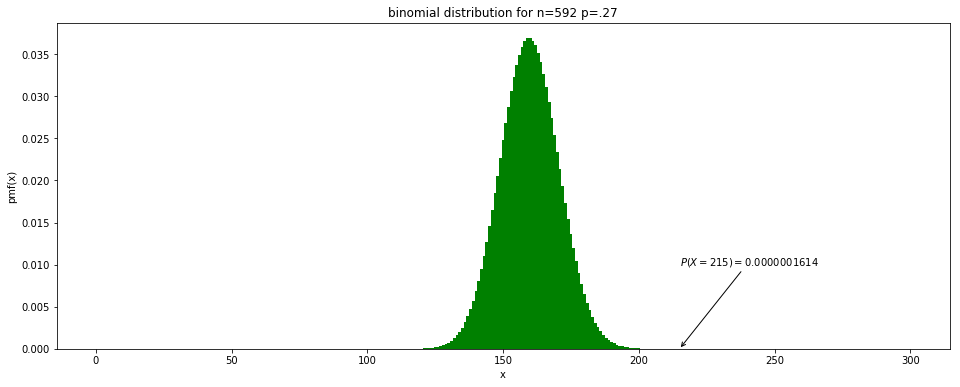

In [114]:
plt.figure(figsize=(16,6))
x = np.arange(1, 300)
y = stats.binom(592, .27).pmf(x)
plt.bar(x, y, width=1, color='green')

plt.bar(215, stats.binom(592, .27).pmf(215), width=3, color='orange')

plt.title('binomial distribution for n=592 p=.27')
plt.xlabel('x')
plt.ylabel('pmf(x)')

plt.annotate('$P(X=215) = {:.10f}$'.format(stats.binom(592, .27).pmf(215)),
             (215, stats.binom(592, .27).pmf(215)), xytext=(215, .010), 
             arrowprops={'arrowstyle': '->'})

## Ways to answer questions that we will practice throughout your time here:

1. data visualization 

2. hypothesis testing

3. machine learning

4. Saying I don't know, but I will try to find out. 


Ways that we will not cover:

1. pulling it out of your arse

2. using statistics to give you the answer you want. 

3. selecting biased samples to prove your point. 



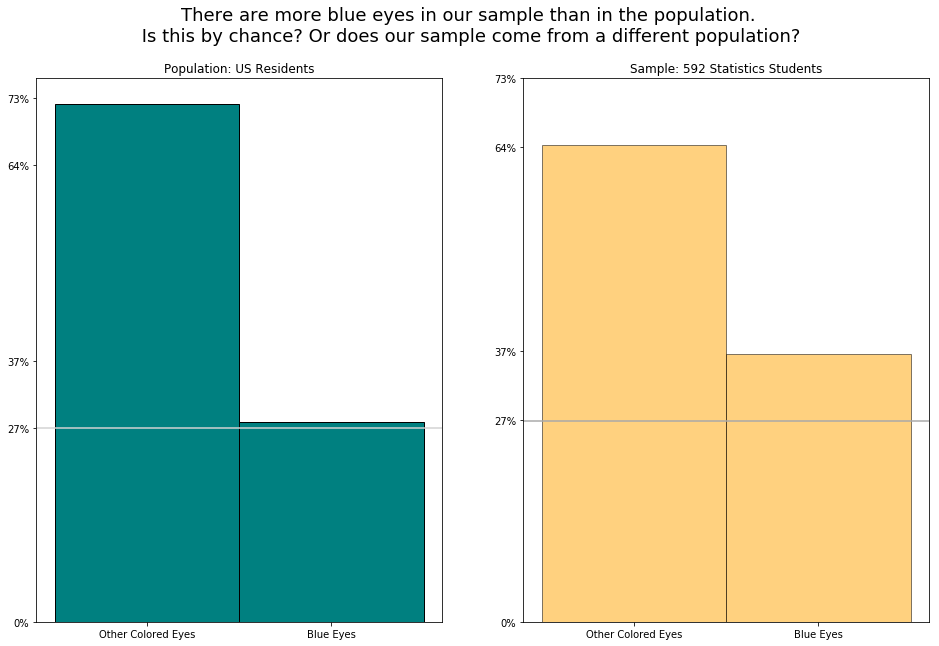

In [115]:

plt.figure(figsize=(16,10))
plt.suptitle('There are more blue eyes in our sample than in the population.\n Is this by chance? Or does our sample come from a different population?\n', 
            size=18)

plt.subplot(1, 2, 1)
x = stats.binom.rvs(size=592, p=.27, n=1)
sample = stats.binom.rvs(size=592, p=.36, n=1)
plt.hist(x, width=1, bins=range(3), edgecolor='black', color='teal', alpha=1, align='left')
x_ticks = [0, 1]
x_labels = ['Other Colored Eyes', 'Blue Eyes']
plt.title('Population: US Residents')
plt.axhline(y=.27*592, color="lightgray")
y_ticks = [0,160, 215, 377, 432]
y_labels = ['0%', '27%', '37%', '64%', '73%']
plt.yticks(y_ticks, y_labels)
plt.xticks(x_ticks, x_labels)

plt.subplot(1, 2, 2)
plt.hist(sample, width=1, bins=range(3), edgecolor='black', color='orange', alpha=.5, align='left')
plt.title('Sample: 592 Statistics Students')
y_ticks = [0,160, 215, 377, 432]
y_labels = ['0%', '27%', '37%', '64%', '73%']
plt.yticks(y_ticks, y_labels)
plt.xticks(x_ticks, x_labels)
plt.axhline(y=.27*592, color="darkgray")
plt.show()

Cases for hypothesis testing

1. Do those who churn spend more than those who do not churn? 
- Are customers with Fiber more likely to churn that those without?
- Are sr. citizens more likely to churn?
- Are students in stats class more likely to have blue eyes than students not taking stats? 
- Are customers without autopayment more likely to churn? 
- Do customers who churn have lower tenure? 
- Is there a linear relationship between tenure and total charges? 
- Is there a linear relationship between tenure and average monthly charges? 

The variables
1. churn (boolean), average_monthly_charges (continuous/numeric)
2. churn (boolean), has_fiber (boolean)
3. churn (boolean), is_senior (boolean)
4. eye_color (categorical), in_stats (boolean)
5. churn (boolean), has_autopayment (boolean)
6. churn (boolean), tenure (numeric)
7. tenure (numeric), total_charges (numeric)
8. tenure (numeric), avg_monththly_charges (numeric)

The data types
1. boolean x numeric
2. boolean x boolean
3. boolean x boolean
4. categorical x boolean
5. boolean x boolean
6. boolean x numeric
7. numeric x numeric
8. numeric x numeric

The types of tests

1. comparison of means (t-test) across the 2 groups (churned customers vs. not churned customers)
2. comparison of proportions/relationships (chi-square)
3. comparison of proportions/relationships (chi-square)
4. comparison of proportions/relationships (chi-square)
5. comparison of proportions/relationships (chi-square)
6. comparison of means (t-test) across the 2 groups (churned customers vs. not churned customers)
7. linear correlation between two continuous values, does one affect the other. (pearson's correlation)
8. linear correlation between two continuous values, does one affect the other. (pearson's correlation)

**Null Hypothesis:** $H_{0}$

the "default", no difference, no change, no effect. 

**Alternative Hypothesis:** $H_{a}$

Generally what your hypothesis is, that there is a difference, an effect, etc. 


1. Do those who churn spend a different amount than those who do not churn?

> $H_{0}$: avg spend for those who churn == avg spend for those who don't. 

> $H_{a}$: avg spend for thos who churn != avg spend for those who don't. 

t-test, p-value < .05

1a. Do those who churn spend more than those who do not churn?


$H_{0}$: avg spend for those who churn <= avg spend for those who don't. 

$H_{a}$: avg spend for thos who churn > avg spend for those who don't. 

2. Are customers with Fiber more or less likely to churn that those without?

$H_{0}$: Customers with Fiber are equally likely to churn than those without. 

$H_{a}$: Customers with fiber are more or less likely to churn than those without. 

2a. Are customers with Fiber more likely to churn that those without?

$H_{0}$: Customers with Fiber are less or equally likely to churn than those without. 

$H_{a}$: Customers with Fiber are more likely to churn than those without. 

3. Are sr. citizens more likely to churn?

$H_{0}$: Sr. are less or equally likely to churn than non-sr.

$H_{a}$: Sr. are more likely to churn than non-sr.

4. Are students in stats class more likely to have blue eyes than students not taking stats?

5. Are customers without autopayment more likely to churn?

6. Do customers who churn have lower tenure?

$H_{0}$: customers who churn have greater or equal tenure than those who don't. 

$H_{a}$: customers who churn have lower tenure. 

7. Is there a linear relationship between tenure and total charges?

$H_{0}$: There is no linear relationship b/w tenure and total charges. 

$H_{a}$: There is a linear relationship b/w tenure and total charges. 

8. Is there a linear relationship between tenure and average monthly charges?

1. id the question
2. state the hypotheses
3. validate assumptions
4. run our test, set our significance level, $\alpha$
5. get results: test statistic & p-value
6. evaluate results and draw conclusions


### Key terms

**p-value:** probability that we observed this result due to chance. if it's less than our alpha, we reject the null hypothesis...there IS a difference, or a relationship. 

**False Negative Rate:** P(FN) = P(Type II Error)
False Negative: Failing to reject null hypothesis when it is false. 
i.e. there is a difference but test told you otherwise. 

**False Positive Rate:** P(FP) = P(Type I Error)
False Positive: Said there was a difference where there wasn't. 
Alpha is your false positive rate. 
